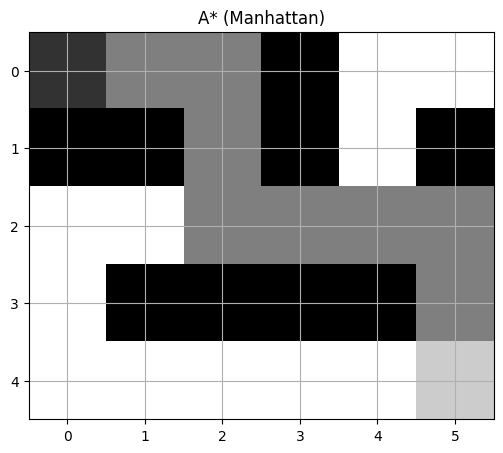

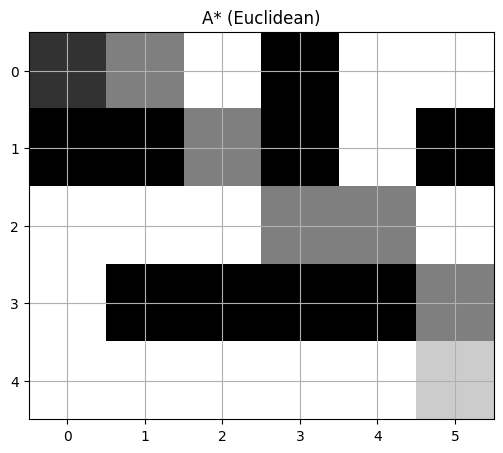

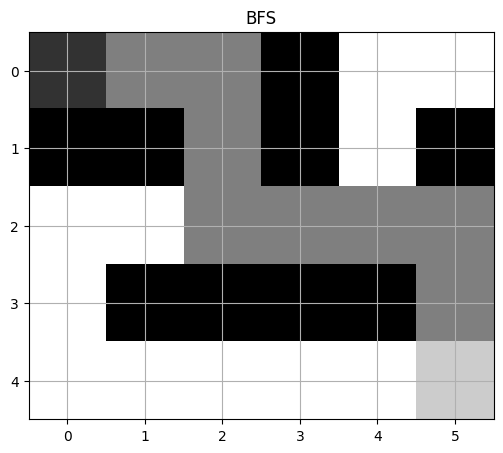

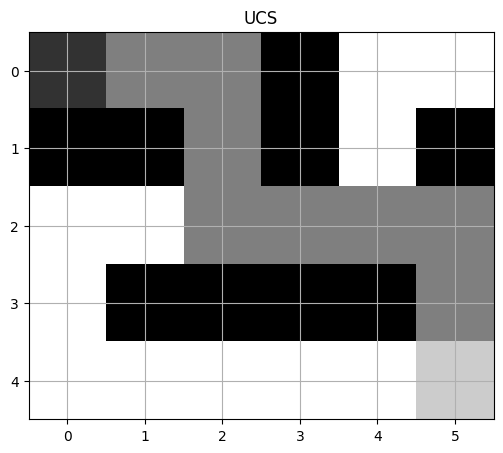

In [ ]:
import heapq
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

DIRECTIONS = {
    'manhattan': [(0, 1), (1, 0), (0, -1), (-1, 0)],
    'euclidean': [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]
}

def get_distance(a, b, method='manhattan'):
    return abs(a[0] - b[0]) + abs(a[1] - b[1]) if method == 'manhattan' else sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

def get_path(came_from, current):
    path = []
    while current:
        path.append(current)
        current = came_from[current]
    return path[::-1]

def is_valid(pos, grid):
    return 0 <= pos[0] < len(grid) and 0 <= pos[1] < len(grid[0]) and grid[pos[0]][pos[1]] == 0

def search(grid, start, goal, method='a*', heuristic='manhattan'):
    frontier = [(0, start)]
    came_from, cost_so_far = {start: None}, {start: 0}
    directions = DIRECTIONS['euclidean' if heuristic == 'euclidean' else 'manhattan']

    while frontier:
        if method in ['a*', 'ucs']:
            cost, current = heapq.heappop(frontier)
        else:
            current = frontier.pop(0)[1]
        if current == goal:
            return get_path(came_from, current)

        for dx, dy in directions:
            neighbor = (current[0] + dx, current[1] + dy)
            if not is_valid(neighbor, grid):
                continue

            move_cost = sqrt(2) if dx and dy else 1
            new_cost = cost_so_far[current] + (move_cost if method != 'bfs' else 1)

            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + (get_distance(neighbor, goal, heuristic) if method == 'a*' else 0)
                heapq.heappush(frontier, (priority, neighbor)) if method in ['a*', 'ucs'] else frontier.append((0, neighbor))
                came_from[neighbor] = current
    return None

def visualize(grid, path, title):
    if not path:
        print(f"No path found for {title}")
        return
    grid_display = np.array(grid, dtype=float)
    for x, y in path:
        grid_display[x, y] = 0.5
    grid_display[path[0]], grid_display[path[-1]] = 0.8, 0.2

    plt.figure(figsize=(6, 6))
    plt.imshow(grid_display, cmap='gray_r')
    plt.title(title)
    plt.grid(True)
    plt.show()

def main():
    grid = [
        [0, 0, 0, 1, 0, 0],
        [1, 1, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0],
    ]
    start, goal = (0, 0), (4, 5)
    algorithms = {
        "A* (Manhattan)": lambda: search(grid, start, goal, 'a*', 'manhattan'),
        "A* (Euclidean)": lambda: search(grid, start, goal, 'a*', 'euclidean'),
        "BFS": lambda: search(grid, start, goal, 'bfs'),
        "UCS": lambda: search(grid, start, goal, 'ucs')
    }

    for name, algorithm in algorithms.items():
        visualize(grid, algorithm(), name)

if __name__ == "__main__":
    main()
